In [1]:
import torch
import json
import h5py
import random
import numpy as np
from matplotlib.pyplot import imshow
from PIL import Image, ImageDraw

In [2]:
# load the following to files from DETECTED_SGG_DIR
custom_prediction = json.load(open('E:/Scene-Graph-Benchmark/output/result/custom_prediction.json'))
custom_data_info = json.load(open('E:/Scene-Graph-Benchmark/output/result/custom_data_info.json'))

In [3]:
def draw_single_box(pic, box, color='red', draw_info=None):
    draw = ImageDraw.Draw(pic)
    x1,y1,x2,y2 = int(box[0]), int(box[1]), int(box[2]), int(box[3])
    draw.rectangle(((x1, y1), (x2, y2)), outline=color)
    if draw_info:
        draw.rectangle(((x1, y1), (x1+50, y1+10)), fill=color)
        info = draw_info
        draw.text((x1, y1), info)
        
def print_list(name, input_list, scores=None):
    for i, item in enumerate(input_list):
        if scores == None:
            print(name + ' ' + str(i) + ': ' + str(item))
        else:
            print(name + ' ' + str(i) + ': ' + str(item) + '; score: ' + str(scores[i]))
    
def draw_image(img_path, boxes, box_labels, rel_labels, box_scores=None, rel_scores=None):
    size = get_size(Image.open(img_path).size)
    pic = Image.open(img_path).resize(size)
    num_obj = len(boxes)
    for i in range(num_obj):
        info = str(i) + '_' + box_labels[i]
        draw_single_box(pic, boxes[i], draw_info=info)
    display(pic)
    print('*' * 50)
    print_list('box_labels', box_labels, box_scores)
    print('*' * 50)
    print_list('rel_labels', rel_labels, rel_scores)
    
    return None

def get_size(image_size):
    min_size = 600
    max_size = 1000
    w, h = image_size
    size = min_size
    if max_size is not None:
        min_original_size = float(min((w, h)))
        max_original_size = float(max((w, h)))
        if max_original_size / min_original_size * size > max_size:
            size = int(round(max_size * min_original_size / max_original_size))
    if (w <= h and w == size) or (h <= w and h == size):
        return (w, h)
    if w < h:
        ow = size
        oh = int(size * h / w)
    else:
        oh = size
        ow = int(size * w / h)
    return (ow, oh)

In [4]:
# parameters
image_idx = 4
box_topk = 30 # select top k bounding boxes
rel_topk = 20 # select top k relationships
ind_to_classes = custom_data_info['ind_to_classes']
ind_to_predicates = custom_data_info['ind_to_predicates']

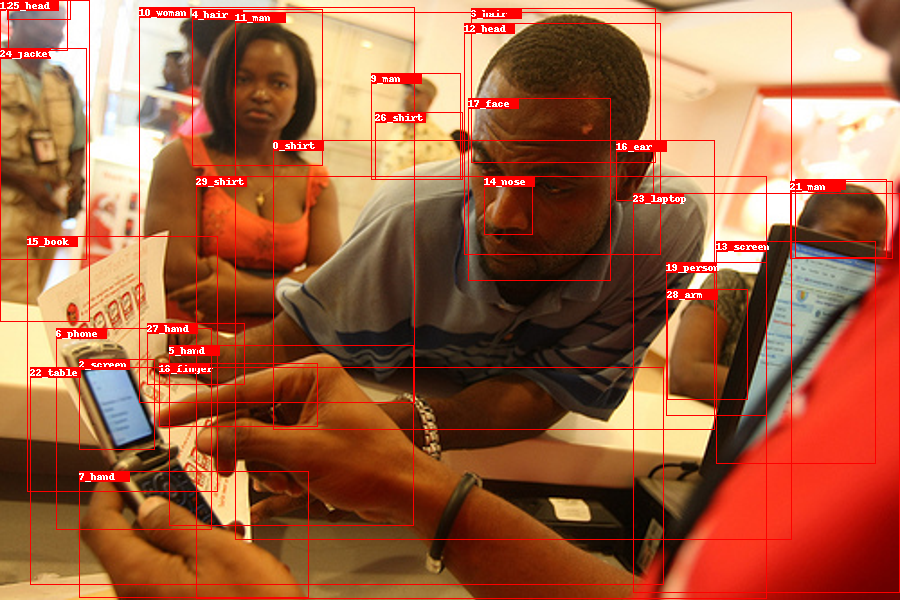

**************************************************
box_labels 0: shirt; score: 0.6824064254760742
box_labels 1: man; score: 0.610804557800293
box_labels 2: screen; score: 0.5528122782707214
box_labels 3: hair; score: 0.5513291358947754
box_labels 4: hair; score: 0.4815366864204407
box_labels 5: hand; score: 0.47702860832214355
box_labels 6: phone; score: 0.3904285132884979
box_labels 7: hand; score: 0.3831843137741089
box_labels 8: head; score: 0.3797661364078522
box_labels 9: man; score: 0.37530601024627686
box_labels 10: woman; score: 0.37085384130477905
box_labels 11: man; score: 0.3305988311767578
box_labels 12: head; score: 0.3006928861141205
box_labels 13: screen; score: 0.2806738317012787
box_labels 14: nose; score: 0.2774679362773895
box_labels 15: book; score: 0.23010843992233276
box_labels 16: ear; score: 0.22786694765090942
box_labels 17: face; score: 0.2256586104631424
box_labels 18: finger; score: 0.22279943525791168
box_labels 19: person; score: 0.17391341924667358
box_la

In [7]:
image_path = custom_data_info['idx_to_files'][image_idx]
boxes = custom_prediction[str(image_idx)]['bbox'][:box_topk]
box_labels = custom_prediction[str(image_idx)]['bbox_labels'][:box_topk]
box_scores = custom_prediction[str(image_idx)]['bbox_scores'][:box_topk]
all_rel_labels = custom_prediction[str(image_idx)]['rel_labels']
all_rel_scores = custom_prediction[str(image_idx)]['rel_scores']
all_rel_pairs = custom_prediction[str(image_idx)]['rel_pairs']

for i in range(len(box_labels)):
    box_labels[i] = ind_to_classes[box_labels[i]]

rel_labels = []
rel_scores = []
for i in range(len(all_rel_pairs)):
    if all_rel_pairs[i][0] < box_topk and all_rel_pairs[i][1] < box_topk:
        rel_scores.append(all_rel_scores[i])
        label = str(all_rel_pairs[i][0]) + '_' + box_labels[all_rel_pairs[i][0]] + ' => ' + ind_to_predicates[all_rel_labels[i]] + ' => ' + str(all_rel_pairs[i][1]) + '_' + box_labels[all_rel_pairs[i][1]]
        rel_labels.append(label)

rel_labels = rel_labels[:rel_topk]
rel_scores = rel_scores[:rel_topk]

draw_image(image_path, boxes, box_labels, rel_labels, box_scores=box_scores, rel_scores=rel_scores)

In [5]:
# parameters
vrdtarget = "E:/data/vrdtarget2.txt"
v_f = open(vrdtarget,'a')

for im in range(0,100):
    image_idx = im
    
    if im<10:
        imname = "0"+str(im)+".jpg"
    else:
        imname = str(im)+".jpg"
    
    box_topk = 30 # select top k bounding boxes
    rel_topk = 20 # select top k relationships
    ind_to_classes = custom_data_info['ind_to_classes']
    ind_to_predicates = custom_data_info['ind_to_predicates']

    image_path = custom_data_info['idx_to_files'][image_idx]
    boxes = custom_prediction[str(image_idx)]['bbox'][:box_topk]
    box_labels = custom_prediction[str(image_idx)]['bbox_labels'][:box_topk]
    box_scores = custom_prediction[str(image_idx)]['bbox_scores'][:box_topk]
    all_rel_labels = custom_prediction[str(image_idx)]['rel_labels']
    all_rel_scores = custom_prediction[str(image_idx)]['rel_scores']
    all_rel_pairs = custom_prediction[str(image_idx)]['rel_pairs']

    for i in range(len(box_labels)):
        box_labels[i] = ind_to_classes[box_labels[i]]

    rel_labels = []
    rel_scores = []
    myboxes=[]
    myboxlabels=[]
    for i in range(len(all_rel_pairs)):
        if all_rel_pairs[i][0] < box_topk and all_rel_pairs[i][1] < box_topk:
            if box_labels[all_rel_pairs[i][0]] in ['woman','man','boy','girl','person'] and ind_to_predicates[all_rel_labels[i]] not in ['wearing','has'] and box_labels[all_rel_pairs[i][1]] not in ['woman','man','boy','girl','person']:
                index2 = all_rel_pairs[i][1]
                box = boxes[index2]
                if box not in myboxes:
                    x1,y1,x2,y2 = str(box[0]), str(box[1]), str(box[2]), str(box[3])
                    boxline=imname+','+x1+','+y1+','+x2+','+y2+'\n'
                    print(boxline)
                    v_f.write(boxline)
            
                    myboxes.append(box)
            
                rel_scores.append(all_rel_scores[i])
                label = str(all_rel_pairs[i][0]) + '_' + box_labels[all_rel_pairs[i][0]] + ' => ' + ind_to_predicates[all_rel_labels[i]] + ' => ' + str(all_rel_pairs[i][1]) + '_' + box_labels[all_rel_pairs[i][1]]
                rel_labels.append(label)

    print(len(myboxlabels))
    print(len(myboxes))

v_f.close()

00.jpg,73.5625,297.25,192.5,446.75

00.jpg,28.40625,9.1328125,779.5,184.625

00.jpg,476.5,3.45703125,791.5,218.75

00.jpg,336.75,535.0,500.25,596.0

00.jpg,503.0,2.158203125,735.0,171.625

00.jpg,35.625,0.0,452.0,202.375

00.jpg,707.5,446.5,797.5,595.5

00.jpg,702.5,0.0,794.5,129.875

00.jpg,672.0,119.9375,766.0,198.25

00.jpg,706.0,451.0,800.0,590.0

00.jpg,725.0,55.4375,762.0,94.3125

0
11
01.jpg,0.0,301.25,781.0,599.0

01.jpg,503.5,355.5,797.5,593.5

01.jpg,5.28125,198.125,794.0,503.0

01.jpg,292.75,182.875,338.75,221.625

01.jpg,76.4375,4.98828125,782.0,247.25

01.jpg,200.625,94.0,282.75,204.0

01.jpg,0.0,0.0,156.875,205.875

01.jpg,463.0,67.0,576.0,189.25

01.jpg,323.75,75.5625,422.75,189.0

01.jpg,622.0,88.75,757.0,225.25

01.jpg,85.0625,166.875,135.0,198.125

01.jpg,349.0,0.0,391.0,49.75

0
12
02.jpg,2.544921875,307.5,780.0,587.5

02.jpg,349.75,332.0,384.25,414.5

02.jpg,390.5,190.25,445.0,209.75

02.jpg,6.18359375,13.2421875,204.125,220.125

02.jpg,67.375,0.0,776.5,259.0

02.jp


63.jpg,394.0,210.5,450.5,261.0

63.jpg,299.0,235.625,391.5,321.25

63.jpg,95.8125,44.5625,302.75,200.125

63.jpg,122.1875,413.75,236.5,484.75

63.jpg,218.125,247.25,297.25,383.75

63.jpg,100.25,403.75,240.25,510.75

63.jpg,89.75,83.875,297.25,102.625

63.jpg,82.1875,410.0,130.5,484.5

0
16
64.jpg,397.5,228.625,567.0,464.0

64.jpg,203.25,235.25,277.25,493.75

64.jpg,517.5,227.5,778.5,312.5

64.jpg,167.0,234.125,213.0,368.75

64.jpg,93.0,477.75,400.5,599.0

64.jpg,110.125,482.75,359.5,588.0

64.jpg,367.0,440.25,772.0,598.5

64.jpg,419.5,452.25,693.5,596.5

64.jpg,651.0,299.75,791.0,384.75

64.jpg,577.5,502.5,642.5,558.5

64.jpg,0.0,53.0,176.75,287.5

64.jpg,591.0,8.453125,799.0,346.25

64.jpg,640.0,461.5,695.0,514.0

64.jpg,164.375,2.546875,300.0,155.875

0
14
65.jpg,2.583984375,0.0,865.5,262.75

65.jpg,5.95703125,1.78515625,221.0,279.0

65.jpg,581.5,1.3466796875,886.5,167.25

65.jpg,811.0,135.875,849.0,195.875

65.jpg,812.0,116.125,859.0,257.75

0
5
66.jpg,402.5,392.5,523.5,584.5

66.j